# Importing libraries

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import polars as pl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path= r'C:\Users\ANITA BOADU\Instacart Basket Analysis'

# Read pickle with Pandas
df_pd = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merge_custs_4.9.pkl'))

# Convert to Polars
ords_prods_merge_custs = pl.from_pandas(df_pd)



In [3]:
ords_prods_merge_custs.shape

(30356957, 25)

In [4]:
ords_prods_merge_custs.head()

Unnamed: 0,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,spending_flag,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,str,f64,f64,f64,i64,str,str,str,str,str,i64,str,i64,str,i64
1,2398795,1,2,3,7,15.0,196,1,1,"""Soda""",77.0,7.0,9.0,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,2,3,7,15.0,10258,2,0,"""Pistachios""",117.0,19.0,3.0,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,2,3,7,15.0,12427,3,1,"""Original Beef Jerky""",23.0,19.0,4.4,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,2,3,7,15.0,13176,4,0,"""Bag of Organic Bananas""",24.0,4.0,10.3,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,2,3,7,15.0,26088,5,1,"""Aged White Cheddar Popcorn""",23.0,19.0,4.7,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423


##### 3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.


####### In a markdown cell beneath your histogram, describe what the histogram demonstrates. 

#########To create an histogram of 'order_hour_of-day', i will have to convert the order_hour_of _day column to pandas.

In [5]:
#converting order_hour_of_day in ords_prods_merge_custs dataframe to pandas
order_hour_of_day = ords_prods_merge_custs.select('order_hour_of_day').to_pandas()

In [7]:
#check output
order_hour_of_day.head()

,order_hour_of_day
0,7
1,7
2,7
3,7
4,7


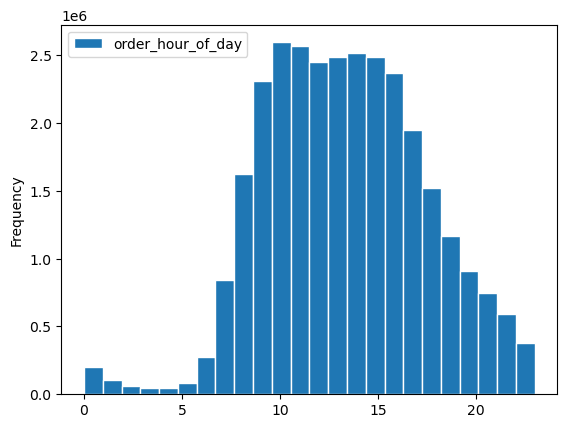

In [8]:
#creating histogram
hist = order_hour_of_day.plot.hist(bins = 24, edgecolor='white')

######## The histogram teCustomers are most active in ordering during typical daytime hours, especially mid-morning to early afternoon.The low volume during early morning and late night hours likely reflects typical human daily activity patterns.Businesses could use this information to plan staffing, inventory, or promotions targeted at peak hours.

###### 4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

#######To create a bar chart of 'loyalty_flag', i will have to convert the loyalty_flag column from polars column to pandas.

In [9]:
#converting loyalty_flag in ords_prods_merge_custs dataframe to pandas
loyalty_flag = ords_prods_merge_custs.select('loyalty_flag').to_pandas()

In [10]:
#check output
loyalty_flag.value_counts()

loyalty_flag  
Loyal customer    10105134
New customer       5156200
Name: count, dtype: int64

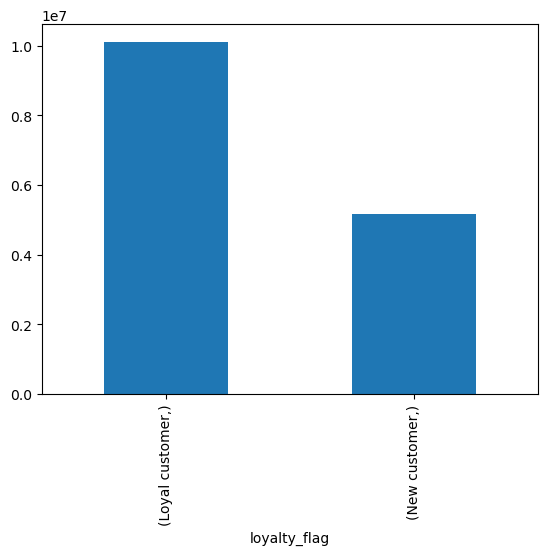

In [15]:
#To plot loyalty flag bar chart
bar = loyalty_flag.value_counts().plot.bar()

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

####### i want to avoid converting the whole ords_prods_merge_custs dataframe to pandas because its a very large file, so i will use only select the neccessary colunmns i need in the exercise 'order_hour_of _day', 'prices', 'age', 'number_of_dependants', income together as a new data set and convert only those columns to pandas. then do 70/30 split sampling method of the dataset.

In [11]:
#converting order_hour_of_day and prices together as a dataframe to pandas
new_pd = ords_prods_merge_custs.select(["order_hour_of_day", "prices", "age", "number_of_dependants", "income"]).to_pandas()

In [12]:
#check output
new_pd.head()

,order_hour_of_day,prices,age,number_of_dependants,income
0,7,9.0,31,3,40423
1,7,3.0,31,3,40423
2,7,4.4,31,3,40423
3,7,10.3,31,3,40423
4,7,4.7,31,3,40423


In [13]:
#Create a random sample 
np.random.seed(4)

In [14]:
#create a list of holding True/False values to the test np.ransom.rand()<=0.7
dev = np.random.rand(len(new_pd)) <= 0.7

In [15]:
#store 70% of the sample in the data frame big
big = new_pd [dev]

In [16]:
#store 30% or the sample in the dataframe small
small = new_pd [~dev]

In [17]:
#check output
len(new_pd)

30356957

In [18]:
len(big) + len(small)

30356957

In [19]:
#check output
new_pd

,order_hour_of_day,prices,age,number_of_dependants,income
0,7,9.0,31,3,40423
1,7,3.0,31,3,40423
2,7,4.4,31,3,40423
3,7,10.3,31,3,40423
4,7,4.7,31,3,40423
...,...,...,...,...,...
30356952,12,5.6,74,3,137969
30356953,12,5.9,74,3,137969
30356954,12,4.2,74,3,137969
30356955,12,4.9,74,3,137969


In [20]:
# A new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [26]:
#check output
df_2

,order_hour_of_day,prices
0,7,9.0
2,7,4.4
3,7,10.3
6,12,9.0
10,12,3.2
...,...,...
30356943,12,11.8
30356949,12,11.5
30356951,12,3.3
30356952,12,5.6


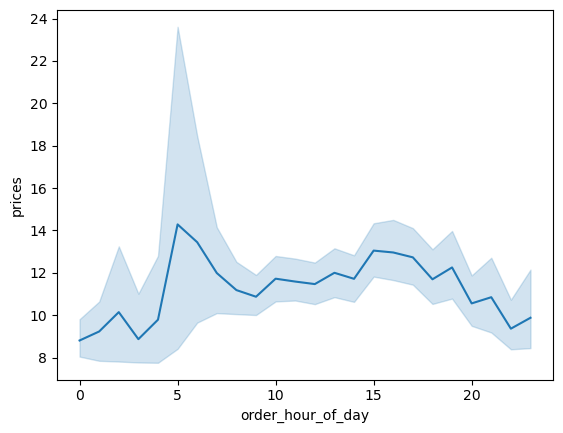

In [22]:
# Create the line chart
line_1 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

#### 6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

#####In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
#new dataframe that contains only the "age" and "number_of_dependants" columns from small subset
df_3 = small[['age','number_of_dependants']]

In [24]:
#check output
df_3

,age,number_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
30356943,74,3
30356949,74,3
30356951,74,3
30356952,74,3


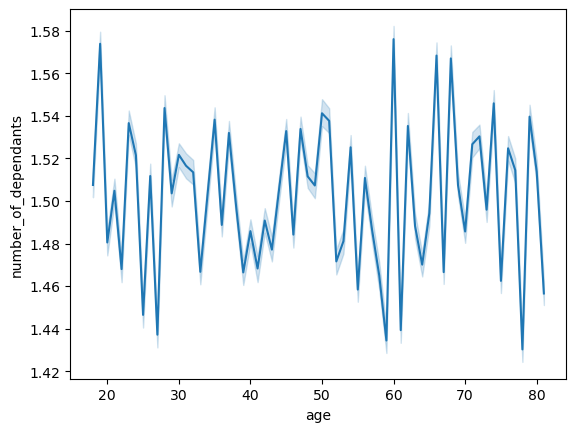

In [25]:
#Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

#####This suggests the number of dependents is somewhat stable but fluctuates slightly with age.Possibly, people in their 30s-50s have dependents (children or others), while older and younger groups have fewer. The fluctuations could be due to sample size differences or natural variability.

## 7.You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [26]:
#Create a new dataframe that contains only the "age" and "income" columns from small subset 
df_4 = small[['age','income']]

In [27]:
#check output
df_4

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423
...,...,...
30356943,74,137969
30356949,74,137969
30356951,74,137969
30356952,74,137969


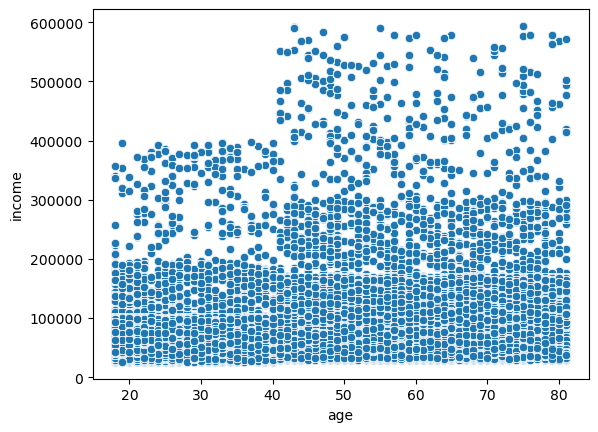

In [33]:
#Create a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

########Income distribution is broad at every age group.Factors beyond age (e.g., profession, education, experience) likely affect income significantly. The presence of many lower income points could reflect entry-level or part-time workers. The scattered high earners may represent senior professionals or specialized roles.

In [36]:
path = r'C:\Users\ANITA BOADU\Achievement 4'
save_dir = os.path.join(path, 'Analysis', 'Visualizations')

os.makedirs(save_dir, exist_ok=True)

#Export Histogram
hist.figure.savefig(os.path.join(save_dir, 'hist_order_hour_of_day.png'))


In [38]:
#Export bar chart
bar.figure.savefig(os.path.join(save_dir, 'bar_loyalty_flag.png'))

In [39]:
#Export Line chart - expenditure (the “prices” column) depending on the hour of the day
line_1.figure.savefig(os.path.join(save_dir, 'line_chart_expenditure_over_hours_of_day.png'))

In [40]:
#Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join(save_dir, 'line_chart_age_and_number_of_dependents.png'))

In [41]:
#Export scatterplot - connection between age and spending power (income)
scatterplot.figure.savefig(os.path.join(save_dir, 'scatterplot_age_and _income.png'))